# MLP model for MNIST dataset

## Essential Imports

In [1]:
import keras

# import Sequential Model
from keras.models import Sequential

# import Flatten and Dense Layer
from keras.layers import Flatten, Dense

# import to_categorical utility 
# for one-hot encoding of labels
from keras.utils import to_categorical

Using TensorFlow backend.


## Working with MNIST Dataset

### Downloading and Loading

In [2]:
mnist = keras.datasets.mnist

# splits data into training and testing parts
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

### One-Hot Encoding of labels

In [3]:
# OHE on train labels
ytrain = to_categorical(ytrain)

#OHE on test labels
ytest = to_categorical(ytest)

### Visualizing Data

In [4]:
# importing matplotlib library for plotting graphs

import matplotlib.pyplot as plt

### Plotting train data (16 samples)

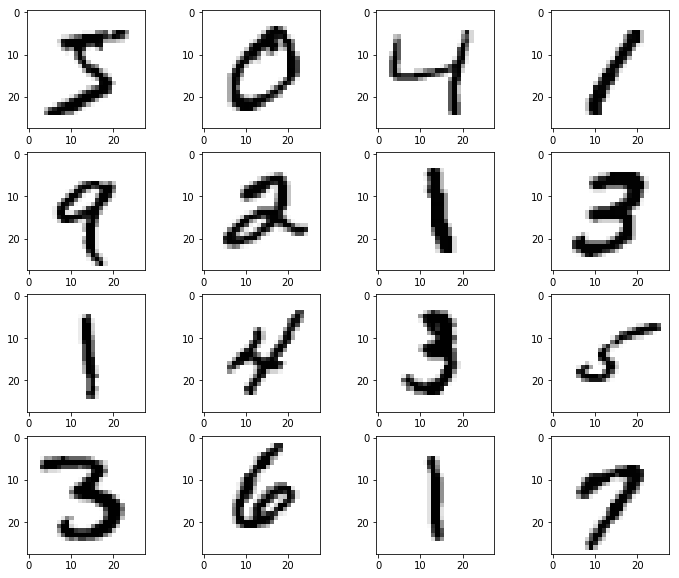

In [5]:
plt.figure(figsize=(12,10))

for i in range(16):
    # Adding subplot so that multiple plots can be displayed in data
    
    plt.subplot(4,4,i+1)
    
    # setting cmap or colormap displays image in black and white
    # as grayscale pixel values are from 0-255
    
    plt.imshow(xtrain[i], cmap='binary')

## Creating the model

In [6]:
# Declaring a sequential model
model = Sequential()

# Since the data contains 2D images
# of size 28x28 pixels each
# We must convert the image in a 1D array
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))

# The output contains 10 different classes
# hence we use softmax activation 
# to find probabilities of sample belonging to EACH CLASS
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### The Final Model

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Fitting the data in the model

In [8]:
# xtrain = datapoints or features
# ytrain = one-hot encoded labels
# epochs = number of times the model needs to be trained 
# validation_split = How much data to be used for validating the training
# batch_size = how many data points to use at a time

# batch_size = 1 (Stochastic)
# batch_size = all data points (Batch)
# batch_size = between 1 and all (mini-batch)

model.fit(xtrain, ytrain, epochs=50, validation_split=0.3, batch_size=1000)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 49us/step - loss: 1.6860 - acc: 0.6242 - val_loss: 1.0723 - val_acc: 0.8252
Epoch 2/50
42000/42000 [==============================] - 1s 23us/step - loss: 0.7812 - acc: 0.8542 - val_loss: 0.5566 - val_acc: 0.8850
Epoch 3/50
42000/42000 [==============================] - 1s 20us/step - loss: 0.4779 - acc: 0.8915 - val_loss: 0.4034 - val_acc: 0.9021
Epoch 4/50
42000/42000 [==============================] - 1s 20us/step - loss: 0.3725 - acc: 0.9074 - val_loss: 0.3419 - val_acc: 0.9103
Epoch 5/50
42000/42000 [==============================] - 1s 20us/step - loss: 0.3225 - acc: 0.9141 - val_loss: 0.3062 - val_acc: 0.9162
Epoch 6/50
42000/42000 [==============================] - 1s 20us/step - loss: 0.2883 - acc: 0.9209 - val_loss: 0.2813 - val_acc: 0.9227
Epoch 7/50
42000/42000 [==============================] - 1s 20us/step - loss: 0.2627 - acc: 0.9262 - val_loss: 0.2640 - val_acc

### model status per epoch

In [9]:
model.history.history

{'val_loss': [1.072262446085612,
  0.5565623392661413,
  0.40339092579152847,
  0.3418639873464902,
  0.3062423426243994,
  0.28133854021628696,
  0.2639603631363975,
  0.25299886531300014,
  0.23933287378814486,
  0.22730490648084217,
  0.22263456342948806,
  0.21435362390345997,
  0.2101939254336887,
  0.20366506940788692,
  0.1975147711733977,
  0.19406954530212614,
  0.19006051495671272,
  0.1804475055800544,
  0.18893268000748423,
  0.18156237941649225,
  0.17942313684357536,
  0.17589376494288445,
  0.1684110259844197,
  0.16743399616744783,
  0.1648301842312018,
  0.16418983083632258,
  0.16249468550086021,
  0.16143798041674826,
  0.16225329538186392,
  0.1619749955005116,
  0.15925930192073187,
  0.16062564526995024,
  0.1523459085987674,
  0.1586246614654859,
  0.1530401785340574,
  0.1626650769677427,
  0.1544341983066665,
  0.16036683403783375,
  0.16100514349010256,
  0.15822225850489405,
  0.15374685906701618,
  0.15626947830120722,
  0.14858451982339224,
  0.149192632900

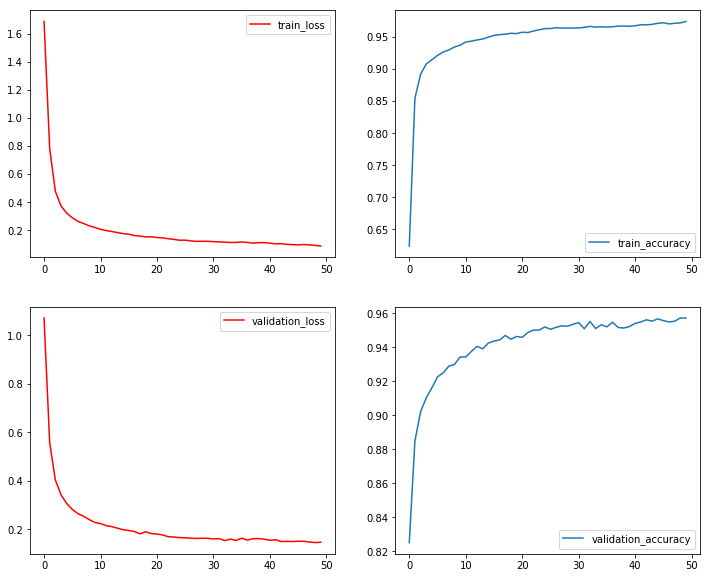

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(model.history.history['loss'], c='r', label='train_loss')
plt.legend()

plt.subplot(2,2,2)
plt.plot(model.history.history['acc'], label='train_accuracy')
plt.legend()

plt.subplot(2,2,3)
plt.plot(model.history.history['val_loss'], c='r', label='validation_loss')
plt.legend()

plt.subplot(2,2,4)
plt.plot(model.history.history['val_acc'], label='validation_accuracy')
plt.legend()

plt.show()

## Evaluating the model

### Predicting values

In [11]:
# The model.predict gives the probabilty 
# of the sample belonging to EACH CLASS

model.predict(xtest)

array([[1.28559259e-05, 1.57757495e-05, 7.43903511e-04, ...,
        9.99015093e-01, 8.03217699e-06, 2.98344785e-05],
       [2.63564616e-05, 3.41747858e-04, 9.99021411e-01, ...,
        8.47669924e-07, 1.50666849e-04, 7.60046035e-08],
       [1.27141311e-05, 9.98677313e-01, 2.42351289e-05, ...,
        4.12907015e-04, 7.23929727e-04, 3.69024237e-05],
       ...,
       [1.52355210e-06, 1.26745954e-05, 1.43486659e-06, ...,
        9.56027798e-05, 4.82957665e-04, 3.74449091e-03],
       [1.37294563e-07, 3.51745825e-06, 1.64515598e-07, ...,
        1.01745414e-07, 1.85135330e-04, 1.21765069e-07],
       [6.35022152e-05, 5.61912339e-06, 2.39367382e-05, ...,
        3.87712447e-07, 2.03562304e-05, 1.31556362e-05]], dtype=float32)

In [12]:
# To get the class which has the MAX PROBABILITY 
# that the sample belongs to it
# argmax is used
import numpy as np

np.argmax(model.predict(xtest), axis=1)

array([7, 2, 1, ..., 4, 5, 6])

### Predicting first 16 samples of test data

In [13]:
np.argmax(model.predict(xtest), axis=1)[:16]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5])

### Plotting test data (16 samples)

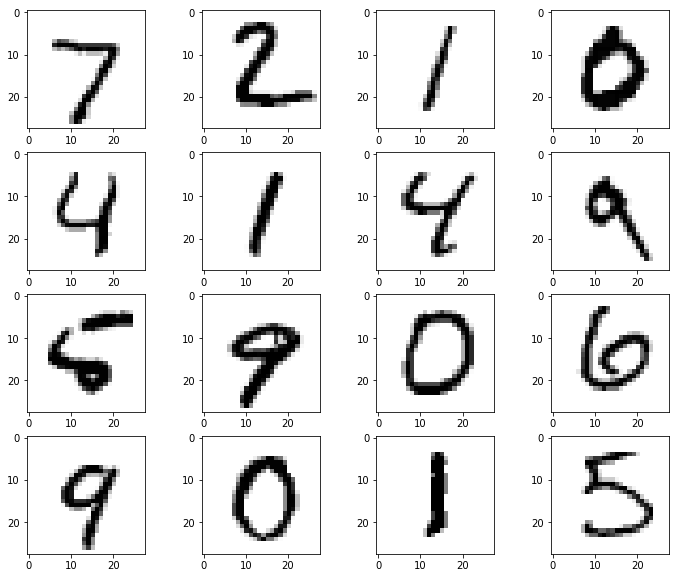

In [14]:
plt.figure(figsize=(12,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(xtest[i], cmap='binary')